## Cleaning

In [253]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import calendar

In [219]:
# Load dataset
districts = pd.read_csv('DistrictCorrespondingZips.csv')
# Rename columns
districts = districts.rename(columns={'ZipCode': 'ZipCode'})
# Drop duplicate rows
districts.drop_duplicates(inplace=True)

In [88]:
# Load dataset
incomes = pd.read_csv('IncomeLevels.csv')
# Rename columns
incomes = incomes.rename(columns={'Zip Code': 'ZipCode'})

In [74]:
# Merge datasets
income_dst = incomes.merge(districts, on='ZipCode', how='inner')
income_dst.columns = ['ZIPCODE', 'POPULATION', 'AVG. INCOME', 'DISTRICT']

income_dst

,ZIPCODE,POPULATION,AVG. INCOME,DISTRICT
0,2116,"19,682","$60,467.00",D4
1,2114,"10,868","$55,678.00",A1
2,2114,"10,868","$55,678.00",A15
3,2122,"24,548","$40,021.00",C11
4,2127,"29,456","$39,625.00",C6
5,2124,"50,781","$36,025.00",B3
6,2128,"38,413","$31,013.00",A7
7,2119,"23,823","$26,120.00",B2


In [467]:
# Load dataset
weather = pd.read_csv('weather.csv')

weather_cln = weather.loc[:,['DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']]

# Convert to datetime
weather_cln['DATE'] = pd.to_datetime(weather_cln['DATE'], format='%Y-%m-%d').dt.date
weather_cln.head()


,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,2015-01-01,0.00,0.0,26,33,22
1,2015-01-02,0.00,0.0,34,41,31
2,2015-01-03,0.62,1.4,28,37,22
3,2015-01-04,0.57,0.0,38,52,35
4,2015-01-05,0.00,0.0,40,50,17


In [468]:
# Load dataset
crime = pd.read_csv('crime.csv',encoding='latin1', low_memory=False)
# Change NaN values to N
crime['SHOOTING'] = crime['SHOOTING'].replace(np.nan, 'N')

crime_cln = crime.loc[:,['INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'SHOOTING', 'OCCURRED_ON_DATE', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', ]]
crime_cln

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,HOUR,UCR_PART
0,I182080058,Disorderly Conduct,E18,N,2018-10-03 20:13:00,Wednesday,20,Part Two
1,I182080053,Property Lost,D14,N,2018-08-30 20:00:00,Thursday,20,Part Three
2,I182080052,Other,B2,N,2018-10-03 19:20:00,Wednesday,19,Part Two
3,I182080051,Aggravated Assault,A1,N,2018-10-03 20:00:00,Wednesday,20,Part One
4,I182080050,Aircraft,A7,N,2018-10-03 20:49:00,Wednesday,20,Part Three
...,...,...,...,...,...,...,...,...
327815,I050310906-00,Warrant Arrests,D4,N,2016-06-05 17:25:00,Sunday,17,Part Three
327816,I030217815-08,Homicide,E18,N,2015-07-09 13:38:00,Thursday,13,Part One
327817,I030217815-08,Warrant Arrests,E18,N,2015-07-09 13:38:00,Thursday,13,Part Three
327818,I010370257-00,Warrant Arrests,E13,N,2016-05-31 19:35:00,Tuesday,19,Part Three


In [469]:
# crime_cln['OCCURRED_ON_DATE'].apply(lambda x: datetime.datetime.date(datetime.datetime.strptime(x, "%Y-%m-%d")))
crime_cln.loc[:,'OCCURRED_ON_DATE'] = pd.to_datetime(crime_cln['OCCURRED_ON_DATE'], format='%Y-%m-%d').dt.date
crime_cln = crime_cln.rename(columns={'OCCURRED_ON_DATE': 'DATE'})
crime_cln.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART
0,I182080058,Disorderly Conduct,E18,N,2018-10-03,Wednesday,20,Part Two
1,I182080053,Property Lost,D14,N,2018-08-30,Thursday,20,Part Three
2,I182080052,Other,B2,N,2018-10-03,Wednesday,19,Part Two
3,I182080051,Aggravated Assault,A1,N,2018-10-03,Wednesday,20,Part One
4,I182080050,Aircraft,A7,N,2018-10-03,Wednesday,20,Part Three


In [470]:
# Merge datasets
weatherCrime = pd.merge(crime_cln, weather_cln, on='DATE', how='inner')
print(weatherCrime.shape)

(327820, 13)


In [14]:
# Drop NaN values 
print(weatherCrime.isnull().values.any())
# null_columns=df.columns[df.isnull().any()]
# print(null_columns)
weatherCrime = weatherCrime.dropna()
print(weatherCrime.isnull().values.any())
print(weatherCrime.shape)

True
False
(325953, 13)


In [322]:
# Merge datasets into a big dataframe 
df = pd.merge(weatherCrime, income_dst, on='DISTRICT', how='inner')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,ZIPCODE,POPULATION,AVG. INCOME,AVG. INCOME NUMERIC
0,I182080052,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0
1,I182080047,Verbal Disputes,B2,N,2018-10-03,Wednesday,19,Part Three,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0
2,I182080035,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0
3,I182080028,Investigate Property,B2,N,2018-10-03,Wednesday,18,Part Three,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0
4,I182080027,Verbal Disputes,B2,N,2018-10-03,Wednesday,18,Part Three,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0


<br>

<br>

# Data Exploration and Analysis

### Incidents and Average Income per District

The first exploration that we will try to find is the relationships between the average income  and the incident counts per district. In other words, we will see if there is any kind of connections between those two attributes (districts will only play as a location attribute) such as low average income will lead to high crime incidents. Data visualization is obviously needed, and our first figure will be a column chart of average income per Boston district.

In [318]:
# Drop the comma in the income values and turn them into float
income_list = [i.replace(",","") for i in income_dst["AVG. INCOME"].values]
avg_income_num = [float(i[1:10]) for i in income_list]
income_dst["AVG. INCOME NUMERIC"] = avg_income_num
# Sort values by district name
income_dst = income_dst.sort_values(by=['DISTRICT'])

income_dst

,ZIPCODE,POPULATION,AVG. INCOME,DISTRICT,AVG. INCOME NUMERIC
1,2114,"10,868","$55,678.00",A1,55678.0
2,2114,"10,868","$55,678.00",A15,55678.0
6,2128,"38,413","$31,013.00",A7,31013.0
7,2119,"23,823","$26,120.00",B2,26120.0
5,2124,"50,781","$36,025.00",B3,36025.0
3,2122,"24,548","$40,021.00",C11,40021.0
4,2127,"29,456","$39,625.00",C6,39625.0
0,2116,"19,682","$60,467.00",D4,60467.0


<Figure size 432x288 with 0 Axes>

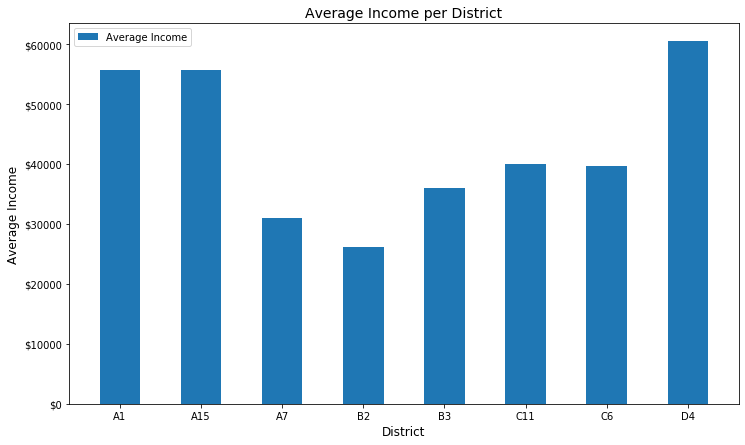

In [319]:
# Plotting
fig = plt.figure()
ax = income_dst.plot.bar(x="DISTRICT", y="AVG. INCOME NUMERIC", figsize=(12,7), label="Average Income") 
ax.set_xticklabels(income_dst["DISTRICT"], rotation=360)

# Set ytick labels with the dollar sign 
formatter = ticker.FormatStrFormatter('$%1.0f') 
ax.yaxis.set_major_formatter(formatter)

# Setting labels 
ax.set_title("Average Income per District", size=14)
ax.set_xlabel("District", size=12)
ax.set_ylabel("Average Income", size=12)
ax.legend()
ax.autoscale(tight=False)
plt.show()

<br>

The second figure will also be a column chart but of incident count per Boston district. Before jumping into plotting the data out with matplotlib, a new dataframe will be created using .groupby() method to catch the total number of incidents in each district.

In [316]:
# Create a new dataframe with incident counts per district
incident_count = crime_cln.groupby(['DISTRICT']).size().reset_index(name="Incident Count")

incident_count

,DISTRICT,Incident Count
0,A1,36735
1,A15,6663
2,A7,13634
3,B2,51288
4,B3,36400
5,C11,43817
6,C6,24190
7,D14,20632
8,D4,43338
9,E13,17981


<Figure size 432x288 with 0 Axes>

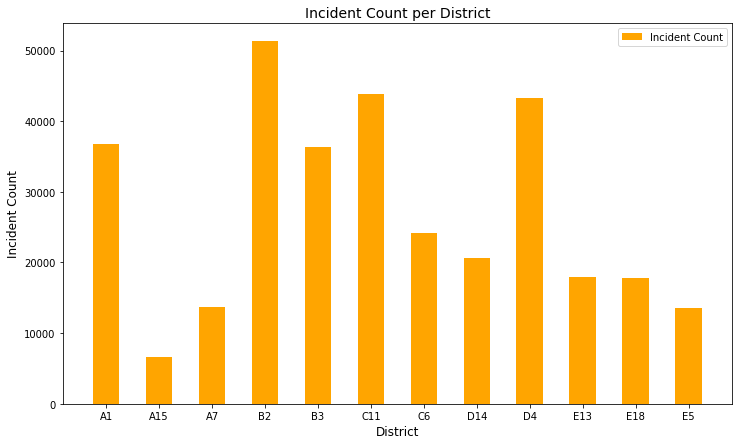

In [317]:
# Plotting
fig = plt.figure()
ax = incident_count.plot.bar(x="DISTRICT", y="Incident Count", color="orange",figsize=(12,7))
ax.set_title("Incident Count per District", size=14)
ax.set_xticklabels(incident_count["DISTRICT"], rotation=360)
ax.set_xlabel("District", size=12)
ax.set_ylabel("Incident Count", size=12)
ax.autoscale(tight=False)
plt.show()

<br>

After having two seperate charts, what we notice is that the second chart has more districts, or more attributes than the first chart. This difference is resulted from the lack of measurements for more zipcodes in the original income dataset. Therefore, the third figure will be a combination of the first two, and the set of districts will be similar to that of the first figure. A double column chart will be plotted in order to efficiently visualize the difference between two graphs. The color of the graphs will be kept the same. We will also have a double y-axis.

In [314]:
# Create a new dataframe that contains only incident counts of the districts in income_dst
incident_count_cut = incident_count["Incident Count"].values[:7]
incident_count_cut = np.append(incident_count_cut, incident_count["Incident Count"].values[8])
incident_count_cut = pd.DataFrame(incident_count_cut, columns=['Incident Count'])
incident_count_cut = pd.concat([income_dst["DISTRICT"].reset_index(), incident_count_cut], axis=1)

incident_count_cut

,index,DISTRICT,Incident Count
0,1,A1,36735
1,2,A15,6663
2,6,A7,13634
3,7,B2,51288
4,5,B3,36400
5,3,C11,43817
6,4,C6,24190
7,0,D4,43338


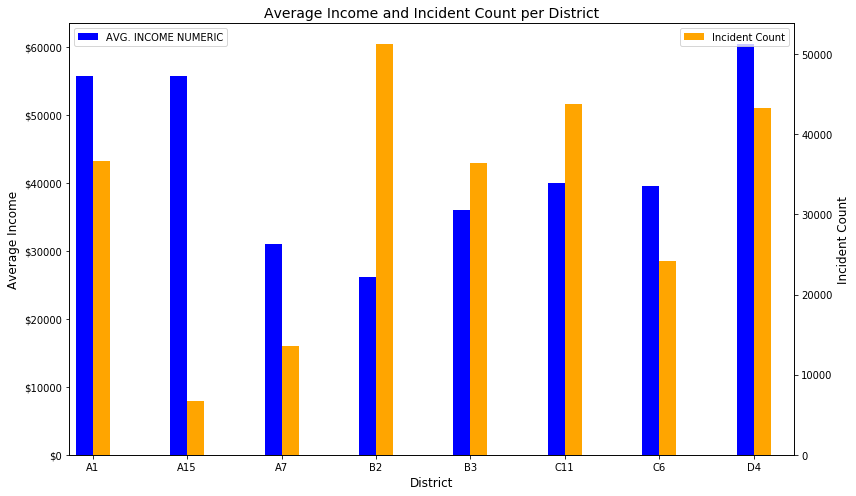

In [315]:
fig, ax1 = plt.subplots(1,1, figsize=(12,7)) # Create matplotlib figure

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

width = 0.18 # Set the bar width

# Plotting for each axes
income_dst.plot.bar(x="DISTRICT", y="AVG. INCOME NUMERIC", color="blue", ax=ax1,
                    width=width, position=1)
ax1.set_xticks([i for i in range(0,8)])
ax1.set_xticklabels(income_dst["DISTRICT"], rotation=360)
formatter = ticker.FormatStrFormatter('$%1.0f') 
ax1.yaxis.set_major_formatter(formatter)
ax1.set_xlabel("District", size=12)
ax1.set_ylabel("Average Income", size=12)
ax1.set_title("Average Income and Incident Count per District", size=14)

incident_count_cut.plot.bar(x="DISTRICT", y="Incident Count", color="orange", ax=ax2,
                       width=width, position=0)
ax2.set_ylabel("Incident Count", size=12)

fig.tight_layout()

plt.show()

This graph gives us insight into whether high rates of crime is co-related to income in any dimension(s). According to this graph, there appears to be some correlation between the two, but not a very strong one. District B2, which has the lowest average income in the city, also has the highest number of criminal incidents out of all the districts. Then, if one looks at district A15 and the number of incidents there, one could think that high crime rate is strongly correlated to low incomes. But districts D4 and A1 put an exception to that rule. The average incomes in those two districts are two of the highest in the City, yet the incidents there are higher than most of the districts. Our group is aware that there may be more variables that could predict crime in certain districts based off income but based off our datasets there is no strong correlation.

<br>

### Crime Rate

The second exploration will be crime rate in Boston. In this exploration, we will continue to use data visualization with matplotlib and graph analysis just like what we did in the first exploration. This time, we only need one column chart. For the sake of plotting, we will create a new dataframe called "crime_pop" from our "incident_count_cut" dataframe and the population values from "income_dst" dataframe. "crime_pop" will contain the incident counts and the population of each district. We then add a "Crime Rate" column to this dataframe with the formula:

                     Crime Rate = Incident Counts \ Population 


In [312]:
# Population list
pop_list = [i.replace(",","") for i in income_dst["POPULATION"].values]

crime_pop = incident_count_cut
crime_pop["Population"] = pop_list
crime_pop["Crime Rate"] = crime_pop["Incident Count"]/crime_pop["Population"].astype('int')

crime_pop

,index,DISTRICT,Incident Count,Population,Crime Rate
0,1,A1,36735,10868,3.380107
1,2,A15,6663,10868,0.613084
2,6,A7,13634,38413,0.354932
3,7,B2,51288,23823,2.152877
4,5,B3,36400,50781,0.716804
5,3,C11,43817,24548,1.784952
6,4,C6,24190,29456,0.821225
7,0,D4,43338,19682,2.201910


<Figure size 432x288 with 0 Axes>

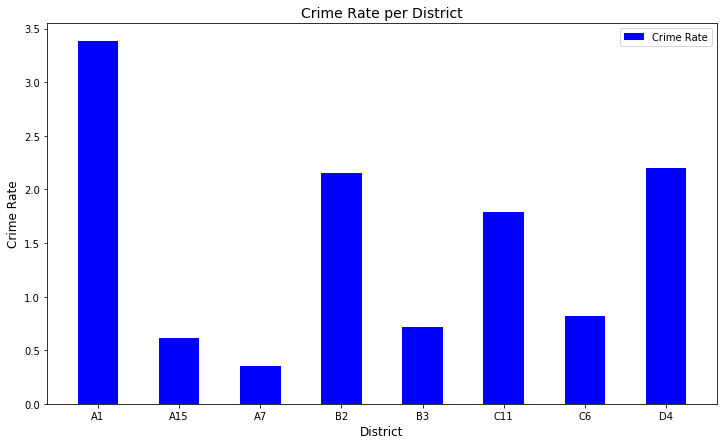

In [313]:
# Plotting
fig = plt.figure()
ax = crime_pop.plot.bar(x="DISTRICT", y="Crime Rate", color='blue', figsize=(12,7))
ax.set_title("Crime Rate per District", size=14)
ax.set_xticklabels(crime_pop["DISTRICT"], rotation=360)
ax.set_xlabel("District", size=12)
ax.set_ylabel("Crime Rate", size=12)
ax.autoscale(tight=False)
plt.show()

The reason why we chose this graph is because it tells us about the crime rate in each district, which we tried to associate with the high population or the median income in that district. This way, we could also figure out how much of a factor income is in the crime. But, as seen in the previous graph, the rule that high income is associated to low crimes was put to rest.
Drawing conclusion from the graph, clearly district A1 has the crime rate out of all the districts with nearly 3.5 crime incidents/person. That is an astonishing rate compared to the lowest rate of just below 0.5 incidents/person in A7 district. Beside A7, B3 and A15 also have one of the lowest crime rates in Boston.


<br>

### Incidents vs Month

Next exploration will be to understand if there is any occurrence betwwen the incident counts and the time of the year. The finding from this data could be related to the season, temperature, or in some extreme and unlikely cases even the local culture. 

Before plotting, we need to extract the month and year from "crime_cln" dataframe, then use .groupby() method to get the incident counts per month, year and put them into a new dataframe. This time, we use a line graph for plotting.

In [307]:
# Extract year and month from the 'DATE' column of crime_cln dataframe
crime_cln['year'] = pd.DatetimeIndex(crime_cln["DATE"]).year
crime_cln['month'] = pd.DatetimeIndex(crime_cln["DATE"]).month
# Convert to month name
crime_cln['month name'] = crime_cln['month'].apply(lambda x: calendar.month_abbr[x])
# Create a new "Month Year" column
crime_cln['Month Year'] = crime_cln['month name'] + ' ' + crime_cln['year'].astype('str')
# Create a new dataframe containing incident counts per month, year. 
crime_month = crime_cln.groupby(['Month Year', 'month', 'year']).size().reset_index(name="Incident Count")
# Sort values by year then month
crime_month = crime_month.sort_values(['year', 'month'])

crime_month = crime_month.reset_index(drop=True)


In [308]:
# Check the head 10
crime_month.head(10)

,Month Year,month,year,Incident Count
0,Jun 2015,6,2015,4191
1,Jul 2015,7,2015,8326
2,Aug 2015,8,2015,8343
3,Sep 2015,9,2015,8415
4,Oct 2015,10,2015,8308
5,Nov 2015,11,2015,7818
6,Dec 2015,12,2015,7991
7,Jan 2016,1,2016,7837
8,Feb 2016,2,2016,7310
9,Mar 2016,3,2016,8199


In [310]:
# Check the tail 10
crime_month.tail(10)

,Month Year,month,year,Incident Count
31,Jan 2018,1,2018,7795
32,Feb 2018,2,2018,6943
33,Mar 2018,3,2018,7778
34,Apr 2018,4,2018,7935
35,May 2018,5,2018,8939
36,Jun 2018,6,2018,8883
37,Jul 2018,7,2018,8617
38,Aug 2018,8,2018,8645
39,Sep 2018,9,2018,8132
40,Oct 2018,10,2018,689


<Figure size 432x288 with 0 Axes>

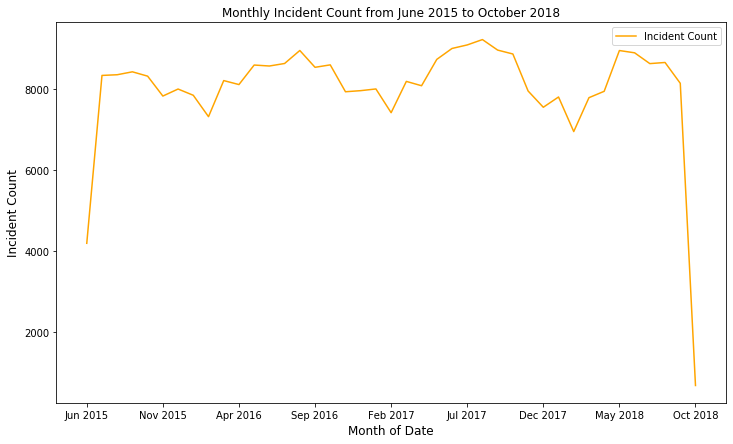

In [500]:
# Plotting
fig = plt.figure()
ax = crime_month.plot(x='Month Year', y="Incident Count", color='orange', figsize=(12,7))
ax.set_title("Monthly Incident Count from June 2015 to October 2018")
ax.set_xlabel("Month of Date", size=12)
ax.set_ylabel("Incident Count", size=12)
ax.autoscale(tight=False)
plt.show()

Clearly, the incidents count in Boston was quite consistent through out the months of our three-year span from 2015 to 2018. The number fluctuated around +/-500 of averagely 8000 cases. The two steep drops at the beginning and the end of the graph do not indicate any significant change in June 2015 and October 2018 but rather because the original dataset starts it measurements on June 15, 2015 and ends it on October 3, 2018. In other words, the incident count in June 2015 was approximately reduced by half in this dataset, and that in October 2018 was only the count of the first three days of the month. Statistically, we can actually back this up. There were 4191 cases in June 2015 according to the dataset, and the average was around 8000+/-500, clearly half of the real data was not counted here. Similarly, if we multiply 3 by 10 (since October has 31 days), we will also get nearly 7000 cases in October 2018, and this number is roughly in the range of our average cases.

To sum up, despite a shortage of data in the first and last month of our measurements, the crime incidents in Boston was quite consistent through out the months. If we have to draw a conclusion about the ups and downs of the figure, it is noticable that there were moderate rises during the summers and drops during the winters. Perhaps, the incidents count, at some level, relate to the change of temperature.

<br>

### Temperature and Crime Vs Months (split by UCR part catogerisation)

Following the possibility stated by the last exploration, we are going to conduct our next discovery of whether there is a connection between temperature and crime. In addition to our monthly incident counts, we will make use of the temperature data. In this exploration, we will create more than one line graphs as we are intended to visualize the data according to UCR part catogerisation. The four parts of UCR that our visualization will be based on are: UCR Part One, UCR Part Two, UCR Part Three, and UCR Other.

The first thing is to divide 'weatherCrime' dataframe into four samller dataframes corresponding to the four different UCR parts. We will use simple dataframe slicing technique.

In [471]:
# Add 'year' and 'month' columns to 'weatherCrime' dataframe
weatherCrime['year'] = pd.DatetimeIndex(weatherCrime["DATE"]).year
weatherCrime['month'] = pd.DatetimeIndex(weatherCrime["DATE"]).month

In [526]:
# New dataframe only contains UCR Part One
UCR_p1 = weatherCrime[weatherCrime["UCR_PART"] == "Part One"]
UCR_p1.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,year,month
2,I182080051,Aggravated Assault,A1,N,2018-10-03,Wednesday,20,Part One,0.21,0.0,59,64,54,2018,10
17,I182080029,Larceny,D4,N,2018-10-03,Wednesday,19,Part One,0.21,0.0,59,64,54,2018,10
20,I182080027,Larceny,B2,N,2018-10-03,Wednesday,18,Part One,0.21,0.0,59,64,54,2018,10
21,I182080025,Robbery,NaN,N,2018-10-03,Wednesday,19,Part One,0.21,0.0,59,64,54,2018,10
37,I182080005,Auto Theft,B2,N,2018-10-03,Wednesday,7,Part One,0.21,0.0,59,64,54,2018,10


In [527]:
UCR_p2 = weatherCrime[weatherCrime["UCR_PART"] == "Part Two"]
UCR_p2.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,year,month
0,I182080058,Disorderly Conduct,E18,N,2018-10-03,Wednesday,20,Part Two,0.21,0.0,59,64,54,2018,10
1,I182080052,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2018,10
6,I182080045,Simple Assault,E18,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2018,10
13,I182080037,Other,C11,N,2018-10-03,Wednesday,18,Part Two,0.21,0.0,59,64,54,2018,10
14,I182080035,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2018,10


In [528]:
UCR_p3 = weatherCrime[weatherCrime["UCR_PART"] == "Part Three"]
UCR_p3.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,year,month
3,I182080050,Aircraft,A7,N,2018-10-03,Wednesday,20,Part Three,0.21,0.0,59,64,54,2018,10
4,I182080048,Motor Vehicle Accident Response,NaN,N,2018-10-03,Wednesday,20,Part Three,0.21,0.0,59,64,54,2018,10
5,I182080047,Verbal Disputes,B2,N,2018-10-03,Wednesday,19,Part Three,0.21,0.0,59,64,54,2018,10
7,I182080044,Towed,D4,N,2018-10-03,Wednesday,20,Part Three,0.21,0.0,59,64,54,2018,10
8,I182080043,Motor Vehicle Accident Response,D14,N,2018-10-03,Wednesday,19,Part Three,0.21,0.0,59,64,54,2018,10


In [529]:
UCR_p4 = weatherCrime[weatherCrime["UCR_PART"] == "Other"]
UCR_p4.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,year,month
605,I182079646,Auto Theft Recovery,B2,N,2018-10-02,Tuesday,16,Other,0.29,0.0,58,64,57,2018,10
659,I182079553,Auto Theft Recovery,B3,N,2018-10-02,Tuesday,9,Other,0.29,0.0,58,64,57,2018,10
665,I182079545,Auto Theft Recovery,B3,N,2018-10-02,Tuesday,9,Other,0.29,0.0,58,64,57,2018,10
942,I182079200,Arson,C11,N,2018-10-01,Monday,7,Other,0.06,0.0,62,68,57,2018,10
1032,I172072294,Auto Theft Recovery,C11,N,2017-08-31,Thursday,19,Other,0.00,0.0,68,79,60,2017,8


The next part is to extract the incidents count for each UCR dataframe. Then we sort the values with same principle as we did with 'crime_month' dataframe. For each UCR dataframe, the incidents count will be put into the 'count' column. Next, we insert 'count' columns into our 'crime_month' dataframe.

In [536]:
# Extract incidents counts
UCR_p1_count = UCR_p1.groupby(["year","month"]).size().reset_index(name='count')
UCR_p2_count = UCR_p2.groupby(["year","month"]).size().reset_index(name='count')
UCR_p3_count = UCR_p3.groupby(["year","month"]).size().reset_index(name='count')
UCR_p4_count = UCR_p4.groupby(["year","month"]).size().reset_index(name='count')

# Sort values
UCR_p1_count = UCR_p1_count.sort_values(['year', 'month'])
UCR_p2_count = UCR_p2_count.sort_values(['year', 'month'])
UCR_p3_count = UCR_p3_count.sort_values(['year', 'month'])
UCR_p4_count = UCR_p4_count.sort_values(['year', 'month'])

# Insert the columns to 'crime_month'
crime_month["Incident Count Part One"] = UCR_p1_count["count"]
crime_month["Incident Count Part Two"] = UCR_p2_count["count"]
crime_month["Incident Count Part Three"] = UCR_p3_count["count"]
crime_month["Incident Count Part Other"] = UCR_p4_count["count"]

We still need one more step before drawing out the graphs. That is to include an "Average Temperature" column in our dataframe. We will work with 'weather_cln' dataframe. The idea is to divide the dataframe into smaller ones from June 2015 to October 2018. Average temperature will be calculated in by adding up all daily TAVG of that month then dividing it by the number of days of that month. 

In [603]:
# Create 'year' and 'month' columns 
weather_cln['year'] = pd.DatetimeIndex(weather_cln["DATE"]).year
weather_cln['month'] = pd.DatetimeIndex(weather_cln["DATE"]).month
# Combine to get 'Month Year' column
weather_cln["Month Year"] = weather_cln['year'].astype(str) + weather_cln['month'].astype(str)
# Get index of June 15, 2015 and October 3, 2018
startIndex = weather_cln.index[weather_cln["Month Year"] == '20156'][14]
endIndex = weather_cln.index[weather_cln["Month Year"] == '201810'][2]

# New dataframe contains temperature from June 15, 2015 to October 3, 2018
weather_cln_cut = weather_cln[startIndex:endIndex+1]

weather_cln_cut.head(20)

,DATE,PRCP,SNOW,TAVG,TMAX,TMIN,year,month,Month Year,Month Year
165,2015-06-15,0.40,0.0,58,63,54,2015,6,20156,20156
166,2015-06-16,0.00,0.0,59,71,56,2015,6,20156,20156
167,2015-06-17,0.00,0.0,66,69,59,2015,6,20156,20156
168,2015-06-18,0.00,0.0,65,76,57,2015,6,20156,20156
169,2015-06-19,0.00,0.0,69,86,63,2015,6,20156,20156
170,2015-06-20,0.04,0.0,65,75,58,2015,6,20156,20156
171,2015-06-21,1.72,0.0,66,76,60,2015,6,20156,20156
172,2015-06-22,0.00,0.0,66,77,61,2015,6,20156,20156
173,2015-06-23,0.01,0.0,72,88,60,2015,6,20156,20156
174,2015-06-24,0.00,0.0,76,84,67,2015,6,20156,20156


In [605]:
# Create a list of unique "Month Year" values
month_list = weather_cln_cut["Month Year"].unique().tolist()

In [ ]:
# List for monthly average temperatures
tavg_list = []

# Create a new 'weather_month' dataframe in each loop. Average temperature will be calculated
# in that dataframe, then we append it to the 'tavg_list'.
for monthYear in month_list:
    weather_month = weather_cln[weather_cln['Month Year'] == monthYear]
    tavg = weather_month['TAVG'].mean()
    tavg_list.append(int(tavg))

Now that we have the list of monthly average temperatures, let's create a new "Average Temperature" column for our 'crime_month' dataframe.

In [622]:
crime_month["Average Temperature"] = tavg_list
crime_month.head(10)

,Month Year,month,year,Incident Count,Incident Count Part One,Incident Count Part Two,Incident Count Part Three,Incident Count Part Other,Average Temperature
0,Jun 2015,6,2015,4191,1022,1386,1773,10,63
1,Jul 2015,7,2015,8326,1995,2840,3461,30,73
2,Aug 2015,8,2015,8343,1971,2795,3552,25,73
3,Sep 2015,9,2015,8415,1895,2800,3694,26,69
4,Oct 2015,10,2015,8308,1871,2768,3641,27,54
5,Nov 2015,11,2015,7818,1732,2610,3454,22,48
6,Dec 2015,12,2015,7991,1770,2526,3670,25,44
7,Jan 2016,1,2016,7837,1573,2483,3748,32,32
8,Feb 2016,2,2016,7310,1269,2497,3513,29,34
9,Mar 2016,3,2016,8199,1511,2876,3773,39,42


Now let's plot them out. But first, since all four graphs will be drawn by the same way, it is more efficient to have a function to do this.

In [630]:
def draw_UCR(temp, crime, number):
    fig, ax1 = plt.subplots(1,1, figsize=(12,7))
    ax1.plot(crime_month["Month Year"], temp, color='blue')
    ax1.set_xticks([0,5,10,15,20,25,30,35,40])
    ax1.set_xticklabels(["Jun 2015", "Nov 2015", "Apr 2016", "Sep 2016", 
                         "Feb 2017", "Jul 2017", "Dec 2017", "May 2018", "Oct 2018"])
    ax1.set_xlabel("Month of Date", size=12)
    ax1.set_ylabel("Temperature (F)", size=12, color='blue')
    ax1.set_title("Temperature and Crime vs Time / UCR Part {0}".format(number), size=14)
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

    ax2.plot(crime_month["Month Year"], crime, color='orange')
    ax2.set_xticks([0,5,10,15,20,25,30,35,40])
    ax2.set_xticklabels(["Jun 2015", "Nov 2015", "Apr 2016", "Sep 2016", 
                         "Feb 2017", "Jul 2017", "Dec 2017", "May 2018", "Oct 2018"])
    ax2.set_ylabel("Incident Count", size=12, color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    fig.tight_layout()
    return plt.show()

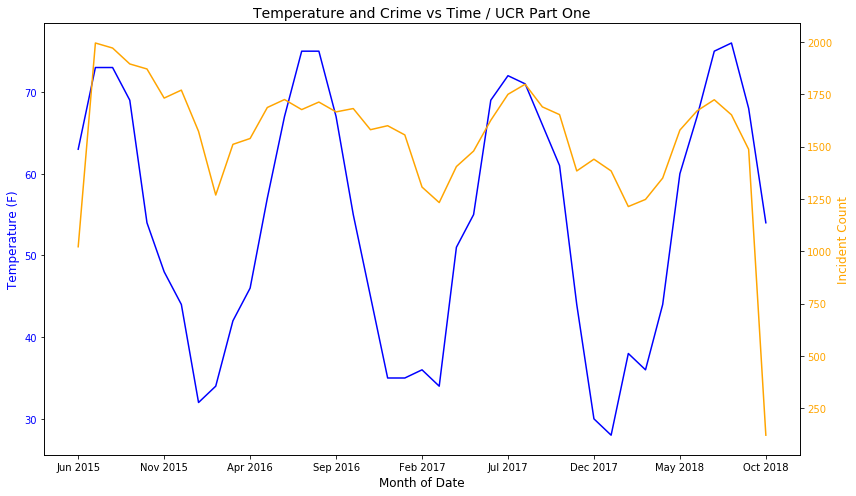

In [631]:
# UCR Part One Graph
draw_UCR(crime_month['Average Temperature'], crime_month['Incident Count Part One'], 'One')

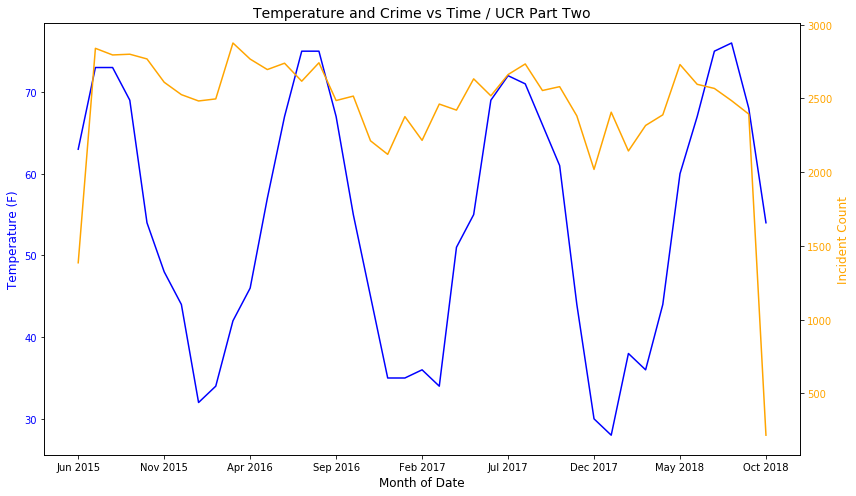

In [632]:
# UCR Part Two Graph
draw_UCR(crime_month['Average Temperature'], crime_month['Incident Count Part Two'], 'Two')

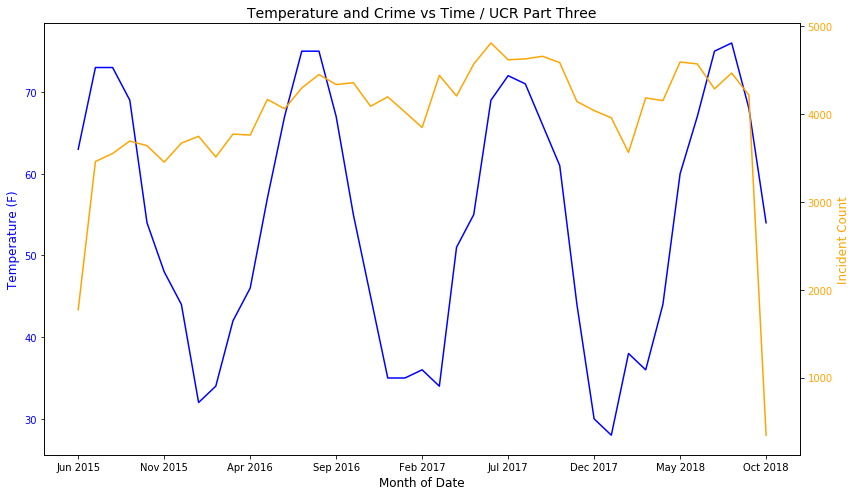

In [633]:
# UCR Part Three Graph
draw_UCR(crime_month['Average Temperature'], crime_month['Incident Count Part Three'], 'Three')

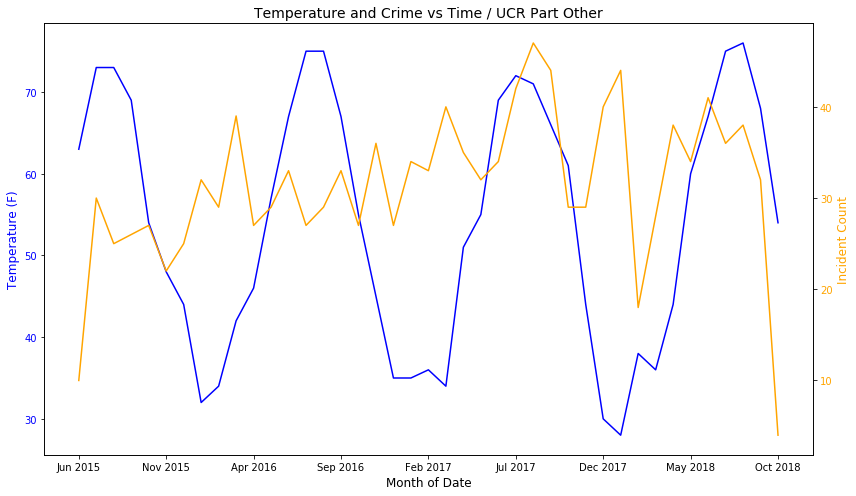

In [634]:
# UCR Part Other Graph
draw_UCR(crime_month['Average Temperature'], crime_month['Incident Count Part Other'], 'Other')

Categorizion helps to eliminate the fact that, one type of crime, being the majority, might affect the other types. Having four graphs visualized like this, we have a pretty clear view on how temperature influenced crime incidents in all four categories of UCR. As the matter of fact, the strongest correlation can only be seen in the first graph where two lines followed quite the same movements. When temperature raised, the incidents count also raised, and the same trend occured when the temperature dropped. 

We also notice the same pattern in the second graph, however, it is not as clear as that in the first one. There were more fluctuations. The third and fourth graphs show almost no correlations between the two attributes. On a side note, we did not take into account the quick rise in June 2015 and the steep fall in October 2018. 

The interesting thing is that in the first three line graphs, the Incident Count pattern, to some extend, resemble that in the "Monthly Incident Count from June 2015 to October 2018" in our previous exploration. The last graph owns the strongest fluction through out the time period. Perhaps, this is due to the difference among the types of crime in the four parts of UCR. 